# TASK 1: PROJECT OVERVIEW - FROM AGENTS TO INTERACTIVE TEAMS

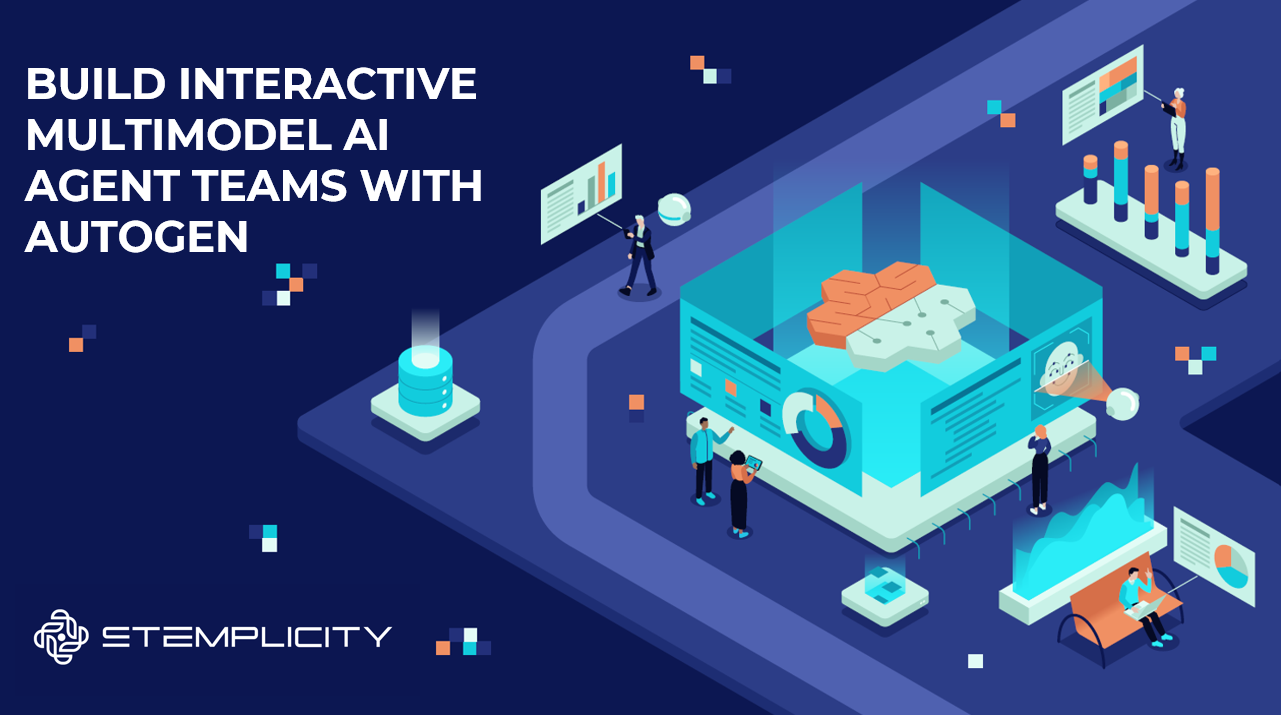


- **Hello everyone! We've explored direct interactions with LLMs and built UIs with Gradio. Now, we dive into a more advanced concept: creating teams of AI Agents that can collaborate and interact with humans using Autogen framework.**

- **Imagine AI assistants that don't just answer your questions but can take on roles (like a Marketing Manager), communicate with each other, and work towards a common goal.**

- **What if these assistants could even use different AI 'brains' (like GPT for one and Gemini for another) within the same team? This is the flexibility we'll explore.**



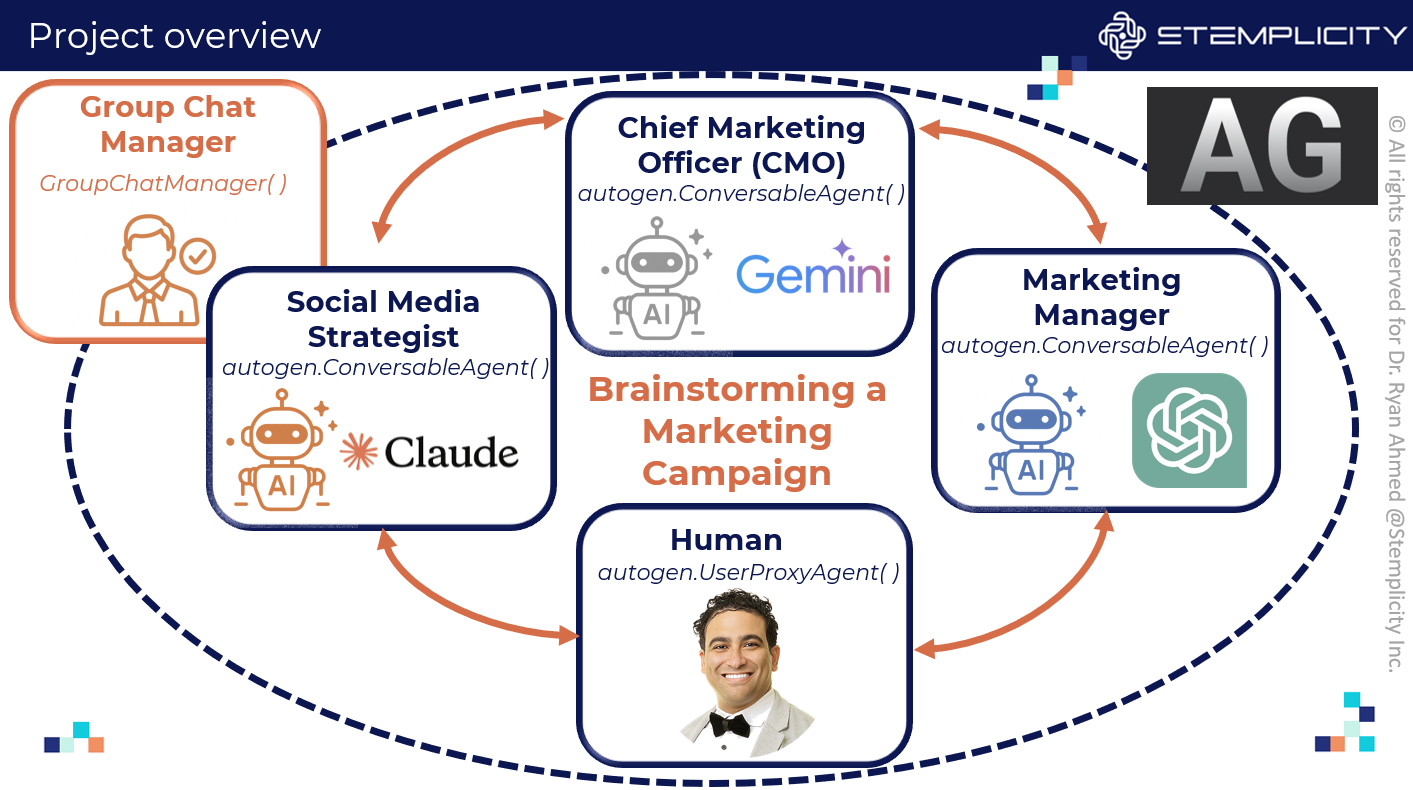

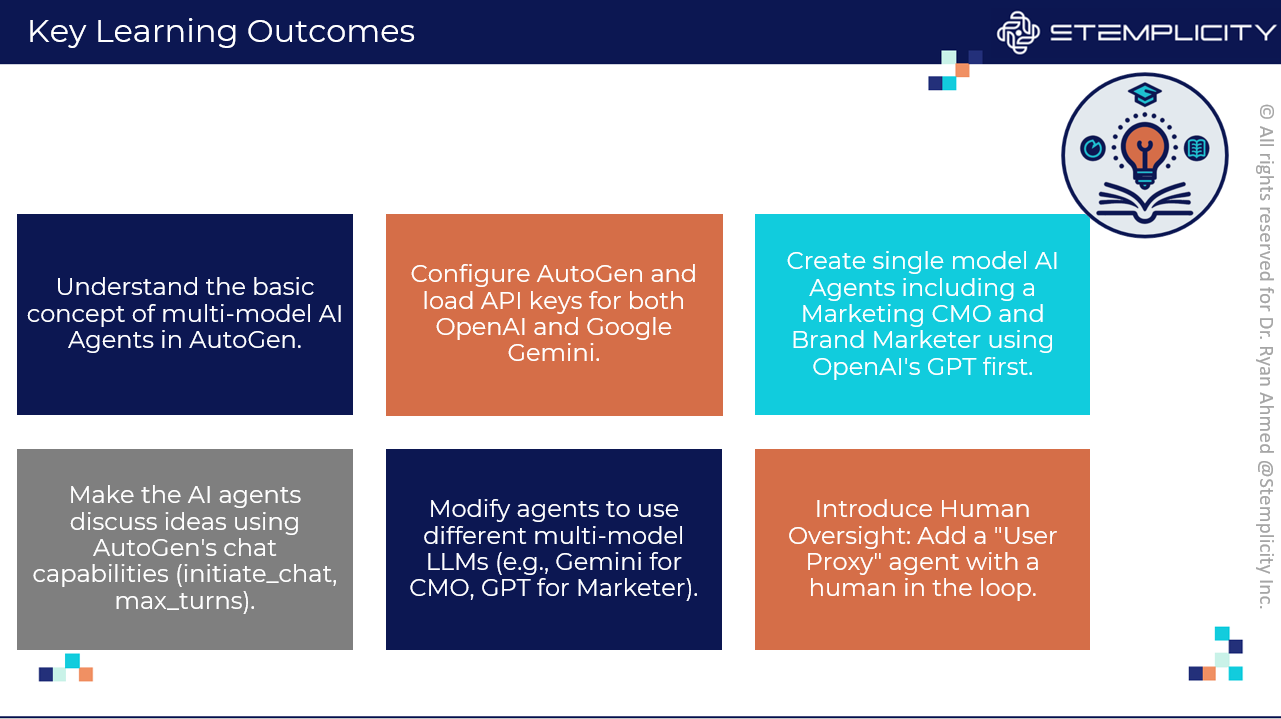

# TASK 2: AUTOGEN 101

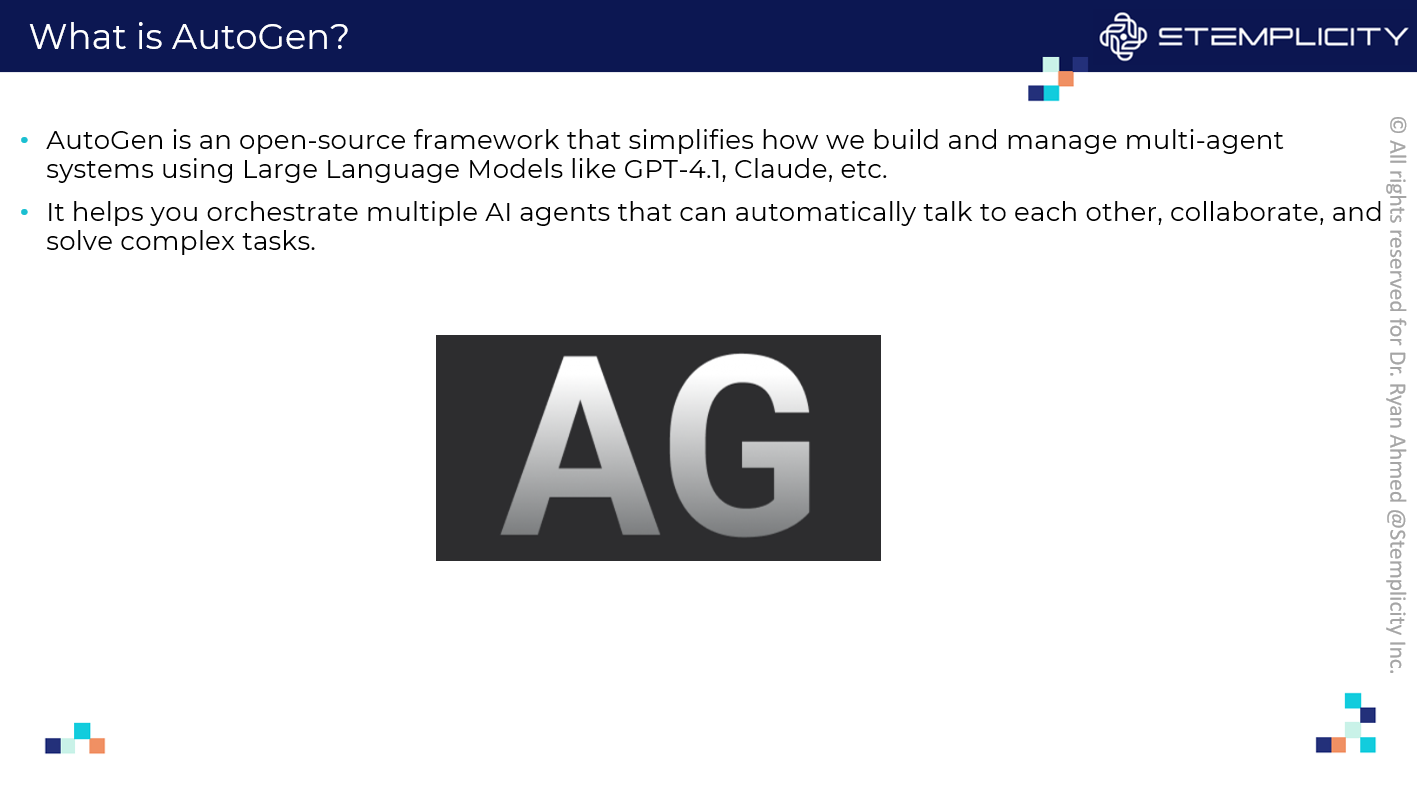

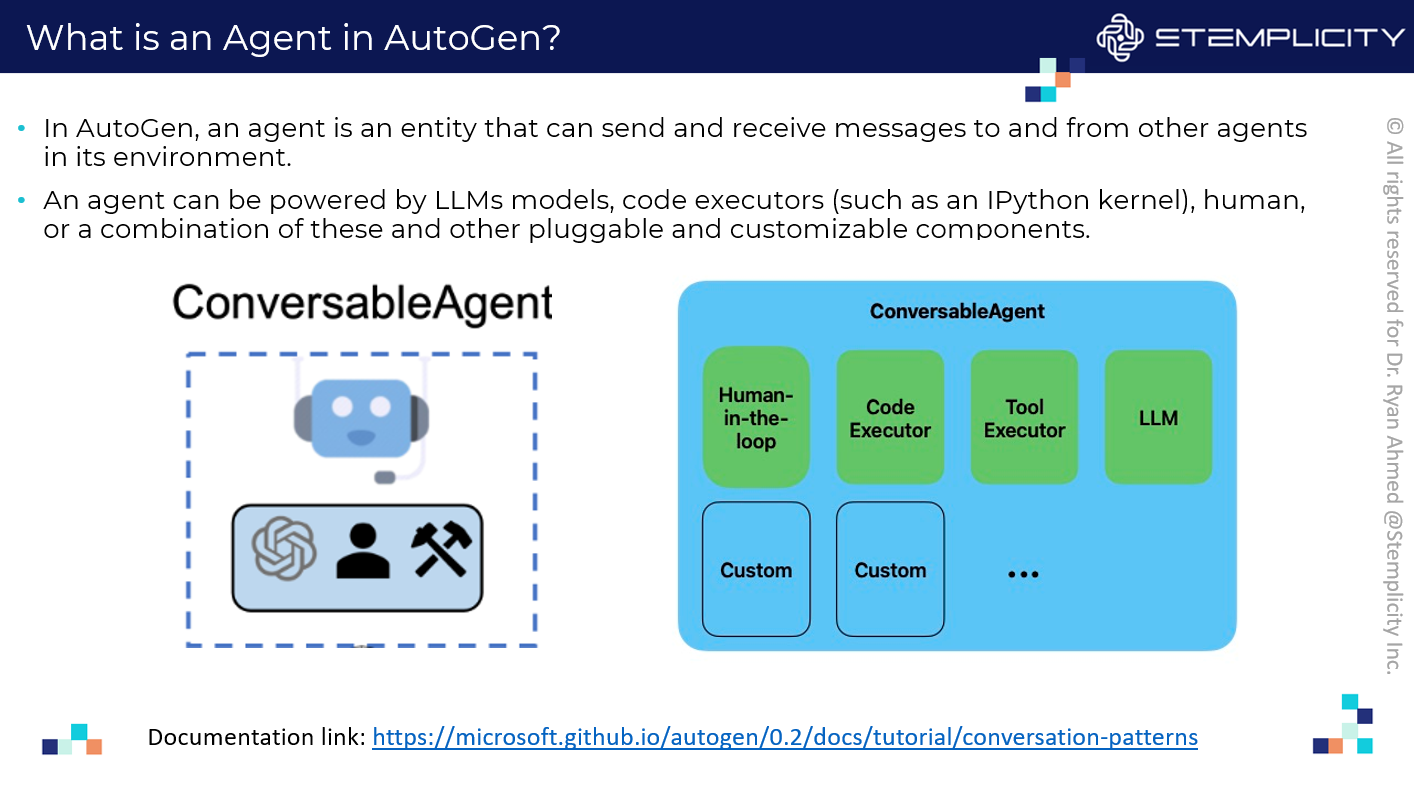

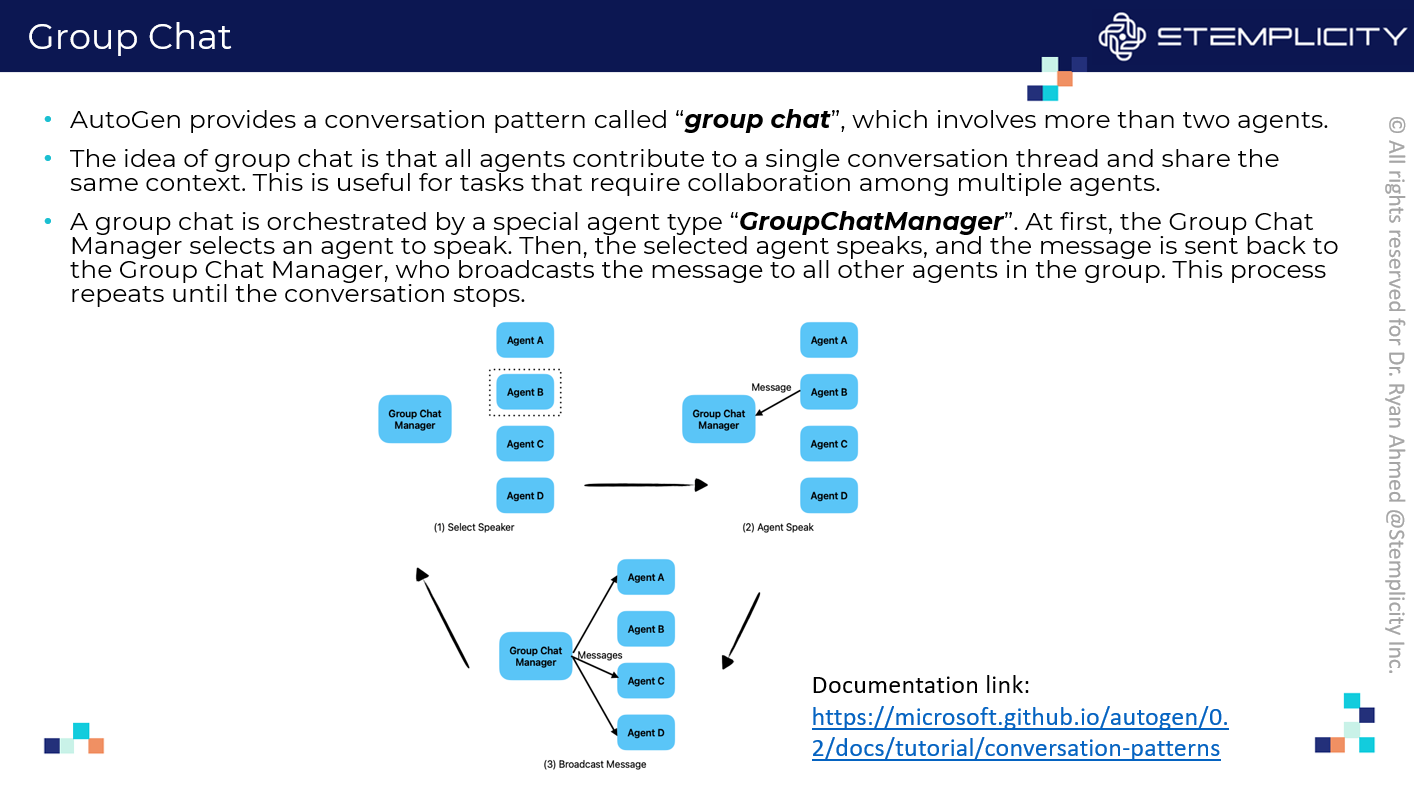

- **Documentation link:** https://microsoft.github.io/autogen/0.2/docs/tutorial/conversation-patterns

**PRACTICE OPPORTUNITY:**
- **Imagine using AI agents to plan a vacation. What are 2-3 distinct roles you could assign? Describe what each agent would specialize in and how they would interact with each other.**
- **Think about how you would design their system messages to guide their behavior.**

# TASK 3: CREATE AN AI AGENT WITH SIMILAR LLM (OPENAI) FIRST

We will need to install `pyautogen` and `openai`. 
Make sure your `.env` file is in the same directory and contains OpenAI API key:

```dotenv
OPENAI_API_KEY=sk-YourSecretOpenAIKeyGoesHereXXXXXXXXXXXXX
```


In [ ]:
# Install necessary libraries
# Added google-generativeai for Gemini models
!pip install -q pyautogen openai python-dotenv gradio google-generativeai "ag2[gemini]"

In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import os
import autogen
import gradio as gr
from openai import OpenAI  # Keep for reference if needed
from dotenv import load_dotenv
from IPython.display import display, Markdown
import random  # Used later for unique Gradio outputs
import google.generativeai as genai  # Import the Google library

# Load environment variables from the .env file
load_dotenv()

# Retrieve API keys from environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")
google_api_key = os.getenv("GOOGLE_API_KEY")  # Load the Google API key

print("Setup Complete: Libraries installed and API keys loaded.")

In [ ]:
# Helper function to print markdown
def print_markdown(text):
    display(Markdown(text))

Before covering Autogen, let's review the core concept of an "AI Agent".

**Analogy: A Specialized Assistant**

Imagine you hire two assistants for a project:

*   **Assistant A (The Planner):** Their job is to understand the *overall goal*, break it down into *steps*, and *delegate* tasks. They focus on the big picture.
*   **Assistant B (The Doer):** Their job is to *execute specific tasks* given to them by the Planner. They focus on the details of implementation.

You wouldn't just give the Doer the final goal; you'd have the Planner instruct the Doer. They might talk back and forth.

**AI Agents are similar:**

*   They are AI instances given a specific **Role** or **Personality**.
*   They have a **Goal** or **Instructions** (defined via a "system message").
*   They can **Communicate** (send messages to each other or a human).
*   They often work **Collaboratively**.
*   Crucially, **they don't all need the same 'brain'**. One agent could use OpenAI's GPT, another Google's Gemini, etc., depending on what fits their role best.

**Autogen** helps us create these assistants and manage their conversations, regardless of the underlying AI model powering them.

Let's start by creating our Chief Marketing Officer (CMO) and Brand Marketer agents, initially having both use the same LLM (OpenAI's GPT) for simplicity. This helps understand the basic agent creation process.

We need to define an `llm_config` specifying the model and API key.

In [ ]:
# Configuration for OpenAI Agent
config_list_openai = [
    {
        "model": "gpt-4o-mini",
        "api_key": openai_api_key,
    }
]

llm_config_openai = {
    "config_list": config_list_openai,
    "temperature": 0.7,  # Use a slightly higher temp for creative marketing ideas
    "timeout": 120,
}

In [ ]:
cmo_prompt = """You are the Chief Marketing Officer (CMO) of a new shoe brand (sustainable).
Provide high-level strategy, define target audiences, and guide the Marketer. Focus on the big picture. Be concise."""

In [ ]:
brand_marketer_prompt = """You are the Brand Marketer for the shoe brand. Brainstorm creative, specific campaign ideas (digital, content, experiences).
Focus on tactics and details. Suggest KPIs for your ideas."""

In [ ]:
# Let's create Agents (Both using OpenAI initially)
# Create the Chief Marketing Officer (CMO) Agent - Using OpenAI for now
cmo_agent_openai = autogen.ConversableAgent(
    name = "Chief_Marketing_Officer_OpenAI",
    system_message = cmo_prompt,
    llm_config = llm_config_openai,  # Assign the OpenAI config
    human_input_mode = "NEVER")

print(f"Agent '{cmo_agent_openai.name}' created (using OpenAI).")

In [ ]:
# Create the Brand Marketer Agent - Using OpenAI for now
brand_marketer_agent_openai = autogen.ConversableAgent(
    name = "Brand_Marketer_OpenAI",
    system_message = brand_marketer_prompt,
    llm_config = llm_config_openai,  # Assign the same OpenAI config
    human_input_mode = "NEVER")

print(f"Agent '{brand_marketer_agent_openai.name}' created (using OpenAI).")

**PRACTICE OPPORTUNITY:**
- **Extend this scenario by creating a third agent `Social Media Strategist` in AutoGen. This agent will play a key role in launching our coordinated social media marketing campaign.**
- **Define the system message and use a similar configuration file for OpenAI. Set the `human_input_mode` to NEVER.**



# TASK 4: TEST AI AGENTS CONVERSATION WITH SIMILAR LLM (FUN ALERT!)

Let's make our *OpenAI-only* agents talk using `initiate_chat()` and `max_turns`. This shows the fundamental conversation flow before we introduce multiple models.


In [ ]:
initial_task_message = """
Context: We're launching a new sustainable shoe line and need campaign ideas
Instruction: Brainstorm a campaign concept with specific elements
Input: Our sustainable, futuristic shoe brand needs marketing direction
Output: A concise campaign concept with the following structure:
Brand Marketer, let's brainstorm initial campaign ideas for our new sustainable shoe line.
Give me a distinct campaign concept. Outline: core idea, target audience, primary channels, and 1-2 KPIs. Keep it concise. Try to arrive at a final answer in 2-3 turns.
"""

print("--- Starting Agent Conversation (OpenAI Only) ---")
print("Chief Marketing Officer (OpenAI) initiating chat with Brand Marketer (OpenAI). Max Turns = 4")
print("--------------------------------------------------")

# Chief Marketing Officer (OpenAI) initiates the chat with Brand Marketer (OpenAI)
chat_result_openai_only = cmo_agent_openai.initiate_chat(
    recipient = brand_marketer_agent_openai, message = initial_task_message, max_turns = 4
)

print("--------------------------------------------------")
print("--- Conversation Ended (OpenAI Only) ---")

In [ ]:
def print_chat_history(chat_result):
    """Any chat result object has a chat_history attribute that contains the conversation history.
    This function prints the conversation history in a readable format.
    """
    for i in chat_result.chat_history:  
        print_markdown(i['name'])
        print("_"*100)
        print_markdown(i['content'])
        print("_"*100)


In [ ]:
# Let's print the chat history
print_chat_history(chat_result_openai_only)

**PRACTICE OPPORTUNITY:**
- **Modify the `max_turns` parameter in the `initiate_chat()` function above to allow for a longer conversation (set it to 6).**

# TASK 5: CONFIGURE MULTI-MODEL AGENTS IN AUTOGEN USING GEMINI AND GPT

Now for the exciting part! Let's give our agents different "brains." We'll configure the **Chief Marketing Officer** to use **Google's Gemini** model and keep the **Brand Marketer** using **OpenAI's GPT**.

We do this to showcase the ability of AutoGen to leverage multiple LLMs and because Gemini might be better at high-level strategy (Chief marketing officer's role), while OpenAI's GPT might excel at creative brainstorming (Marketer's role). There are also cost or availability considerations as well.

**Steps:**
1.  Define a new `config_list` specifically for Google Gemini models.
2.  Create a corresponding `llm_config` for Gemini.
3.  Re-create the agents, assigning the `llm_config_gemini` to the Chief Marketing Officer and `llm_config_openai` to the Brand Marketer.

In [ ]:
# Configuration for Google Gemini Agent
# Note: Ensure GOOGLE_API_KEY is loaded correctly from your .env file
config_list_gemini = [
    {
        "model": "gemini-2.0-flash",  # Or "gemini-pro"
        "api_key": google_api_key,
        "api_type": "google",  # Specify the API type for Autogen's Google integration
    }
]

llm_config_gemini = {
    "config_list": config_list_gemini,
    "temperature": 0.6,  # Maybe slightly less randomness for strategic Chief Marketing Officer
    "timeout": 120,
}

In [ ]:
# Let's create our agents using different models
# Create the Chief Marketing Officer Agent now using Google Gemini
cmo_agent_gemini = autogen.ConversableAgent(
    name = "Chief_Marketing_Officer_Gemini",
    system_message = cmo_prompt,
    llm_config = llm_config_gemini,  # Assign the Gemini config!
    human_input_mode = "NEVER")

# Create the Brand Marketer Agent using OpenAI GPT (this is similar to before!)
# We can reuse the llm_config_openai defined earlier
brand_marketer_agent_openai_mixed = autogen.ConversableAgent(
    name = "Brand_Marketer_OpenAI",  # Keep name consistent if desired, or update
    system_message = brand_marketer_prompt,
    llm_config = llm_config_openai,  # Assign the OpenAI config!
    human_input_mode = "NEVER")

print(f"Agent '{cmo_agent_gemini.name}' created (using Google Gemini).")
print(f"Agent '{brand_marketer_agent_openai_mixed.name}' created (using OpenAI).")

**PRACTICE OPPORTUNITY:**
- **Configure the Social Media Strategist to use Claude API instead of OpenAI's API (External Research is Required)**

# TASK 6: TRIGGER AI AGENTS CONVERSATION (A MULTI-MODEL TEAM)

Let's initiate the same chat as before, but now using our **mixed-model team**: the Gemini-powered Chief Marketing Officer and the OpenAI's GPT-powered Brand Marketer.

Observe the conversation flow. Do you notice any subtle differences in style or focus compared to the OpenAI-only chat, potentially due to the different underlying models?


In [ ]:
# Note that this demo illustrates the potential benefit of using multiple models in agent-based systems, where each model's strengths can be leveraged for specific roles in the conversation.
# Nott that The Gemini and OpenAI combination created a more balanced conversation
# Gemini's conciseness as CMO complemented OpenAI's creative detail as Marketer
# The conversation flow was more efficient with clearer role differentiation
# Demonstrated how different models can be strategically assigned to roles that match their strengths

print("--- Starting Agent Conversation (Multi-Model: Gemini + OpenAI) ---")
print("Chief Marketing Officer (Gemini) initiating chat with Brand Marketer (OpenAI). Max Turns = 4")
print("------------------------------------------------------------------")

# Chief Marketing Officer (Gemini) initiates the chat with the Brand Marketer (OpenAI)
chat_result_multi_model = cmo_agent_gemini.initiate_chat(
    recipient = brand_marketer_agent_openai_mixed,  # Target the OpenAI marketer
    message = initial_task_message,
    max_turns = 4)

print("------------------------------------------------------------------")
print("--- Conversation Ended (Multi-Model) ---")


In [ ]:
print_chat_history(chat_result_multi_model)

**PRACTICE OPPORTUNITY:**
- **Increase the temperature value for Gemini's Chief Marketing Officer and GPT's Brand Marketer to a very large value, e.g.:`temperature = 1.6`, run the conversation for 6 iterations instead. Notice that they might become little erratic (drunk!). Set the values back to `temperature = 0.6`.**

# TASK 7: ADDING HUMAN GUIDANCE (USER PROXY AGENT) & LEVERAGING GROUPCHAT

Now, let's add the `UserProxyAgent` back, allowing you to interact with the multi-model team (Gemini CMO + OpenAI Marketer).


In [ ]:
# Create the User Proxy Agent (Represents You)
user_proxy_agent = autogen.UserProxyAgent(
    name = "Human_User_Proxy",
    human_input_mode = "ALWAYS",  # Prompt user for input until 'exit'
    max_consecutive_auto_reply = 1,
    is_termination_msg = lambda x: x.get("content", "").rstrip().lower() in ["exit", "quit", "terminate"],
    code_execution_config = False,
    system_message = "You are the human user interacting with a multi-model AI team (Gemini CMO, OpenAI Marketer). Guide the brainstorm. Type 'exit' to end.",
)

print(f"Agent '{user_proxy_agent.name}' created for HIL with multi-model team.")

# %% [markdown]
# **Initiating HIL Chat with the Multi-Model Team**

# %%
print("--- Starting Human-in-the-Loop (HIL) Conversation (Multi-Model) ---")
print("You will interact with Gemini CMO and OpenAI Marketer. Type 'exit' to end.")
print("---------------------------------------------------------------------")

In [ ]:
# Reset agents for a clean new session
cmo_agent_gemini.reset()  # Reset Gemini CMO
brand_marketer_agent_openai_mixed.reset()  # Reset OpenAI Marketer
user_proxy_agent.reset()

In [ ]:
from autogen import GroupChat, GroupChatManager

# Create a GroupChat with multiple agents
# This sets up a collaborative chat environment where multiple agents can interact
groupchat = GroupChat(
    agents = [user_proxy_agent, cmo_agent_gemini, brand_marketer_agent_openai],  # List of agents participating in the group chat
    messages = [ ],  # Initialize with empty message history
    max_round = 20,  # Optional: Limits how many conversation rounds can occur before terminating
)

# Create a manager for the group chat
# The GroupChatManager orchestrates the conversation flow between agents
# It determines which agent should speak next and handles the overall conversation logic
group_manager = GroupChatManager(groupchat = groupchat, llm_config = llm_config_openai)  # Uses OpenAI's LLM to manage the conversation

In [ ]:
# User Proxy initiates the chat - Let's give a new task
group_chat_result = group_manager.initiate_chat(
    recipient = user_proxy_agent,  # Start by talking to the Gemini CMO
    message = """Hello team!!""",
)

print("---------------------------------------------------------------------")
print("--- Conversation Ended (Human terminated or Max Turns) ---")

In [ ]:
print_chat_history(group_chat_result)

**PRACTICE OPPORTUNITY:** 
- **Let's add our Social Media Strategist agent, powered by Claude, to our team and add the new agent to our existing GroupChat**
- **Re-run the AI Agents group chat initiation cell with a new prompt that engages all three agents (CMO, Brand Marketer, and Social Media Strategist)**

# PRACTICE OPPORTUNITIES SOLUTION

**PRACTICE OPPORTUNITY SOLUTION:**
- **Imagine using AI agents to plan a vacation. What are 2-3 distinct roles you could assign? Describe what each agent would specialize in and how they would interact with each other.**
- **Think about how you would design their system messages to guide their behavior.**

Here are three AI agent roles for vacation planning:

1. **Destination Research Agent:** Specializes in matching traveller preferences with suitable locations. This agent would have extensive knowledge of global destinations, seasonal considerations, and travel trends. It could suggest destinations based on budget, interests (adventure, relaxation, culture), weather preferences, and travel time constraints.
2. **Logistics & Booking Agent:** Focuses on finding and securing the best travel arrangements. This agent would search for flight options, accommodation deals, local transportation, and activity reservations. It would handle scheduling, price comparisons, and booking confirmations while ensuring all components work together seamlessly.
3. **Local Experience Agent:** Provides knowledge about the chosen destination. This agent would recommend authentic restaurants, hidden attractions, and cultural norms. It could create personalized daily itineraries based on travellers' interests, mobility needs, and pace preferences, while adapting to weather changes or unexpected events.

**PRACTICE OPPORTUNITY SOLUTION:**
- **Extend this scenario by creating a third AI agent as a Social Media Strategist in AutoGen named `Social_Media_OpenAI`. This agent will play a key role in launching our coordinated social media marketing campaign.**
- **Define the system message and use a similar configuration file for OpenAI. Set the `human_input_mode` to NEVER.**


In [ ]:
social_media_prompt = """You are the Social Media Strategist for a new sustainable shoe brand. 
            Develop creative social media posts, suggest platforms, posting times, and engagement strategies. 
            Work with the Brand Marketer and CMO."""

In [ ]:
# Let's create our social media strategist Agent - Using OpenAI for now
social_media_agent_openai = autogen.ConversableAgent(
    name = "Social_Media_OpenAI",
    system_message = social_media_prompt,
    llm_config = llm_config_openai,  # Assign the OpenAI config
    human_input_mode = "NEVER")

print(f"Agent '{social_media_agent_openai.name}' created (using OpenAI).")

**PRACTICE OPPORTUNITY SOLUTION:**
- **Modify the `max_turns` parameter in the `initiate_chat()` function above to allow for a longer conversation (set it to 6).**

In [ ]:
chat_result_openai_only = cmo_agent_openai.initiate_chat(
    recipient = brand_marketer_agent_openai, message = initial_task_message, max_turns = 6)


**PRACTICE OPPORTUNITY SOLUTION:**
- **Configure the Social Media Strategist to use Claude API instead of OpenAI's API (External Research is Required)**

In [ ]:
# Configuration for Claude Agent
config_list_claude = [
    {
        "model": "claude-3-5-sonnet-20240620",
        "api_key": os.getenv("ANTHROPIC_API_KEY"),
        "api_type": "anthropic",
    }
]

llm_config_claude = {
    "config_list": config_list_claude,
    "temperature": 0.6,  # Use a slightly higher temp for creative marketing ideas
    "timeout": 120,
}

In [ ]:
social_media_prompt = """You are the Social Media Strategist for a new sustainable shoe brand. 
            Develop creative social media posts, suggest platforms, posting times, and engagement strategies. 
            Work with the Brand Marketer and CMO."""

In [ ]:
# Let's create our social media strategist Agent using Claude
social_media_agent_claude = autogen.ConversableAgent(
    name = "Social_Media_Claude",
    system_message = social_media_prompt,
    llm_config = llm_config_claude,  # Assign the Claude config
    human_input_mode = "NEVER")

print(f"Agent '{social_media_agent_claude.name}' created (using Claude).")

**PRACTICE OPPORTUNITY SOLUTION:**
- **Increase the temperature value for Gemini's Chief Marketing Officer and GPT's Brand Marketer to a very large value, e.g.:`temperature = 1.6`, run the conversation for 6 iterations instead. Notice that they might become little erratic (drunk!)**

In [ ]:
initial_task_message = """
Context: We're launching a new sustainable shoe line and need campaign ideas
Instruction: Brainstorm a campaign concept with specific elements
Input: Our sustainable, futuristic shoe brand needs marketing direction
Output: A concise campaign concept with the following structure:
Brand Marketer, let's brainstorm initial campaign ideas for our new sustainable shoe line.
Give me a distinct campaign concept. Outline: core idea, target audience, primary channels, and 1-2 KPIs. Keep it concise. Try to arrive at a final answer in 2-3 turns.
"""

In [ ]:
# Configuration for Google Gemini Agent
# Note: Ensure GOOGLE_API_KEY is loaded correctly from your .env file
config_list_gemini = [
    {
        "model": "gemini-2.0-flash",  # Or "gemini-pro"
        "api_key": google_api_key,
        "api_type": "google",  # Specify the API type for Autogen's Google integration
    }
]

llm_config_gemini = {
    "config_list": config_list_gemini,
    "temperature": 1.6,  # Maybe slightly less randomness for strategic Chief Marketing Officer
    "timeout": 15,
}

In [ ]:
# Let's create our agents using different models
# Create the Chief Marketing Officer Agent now using Google Gemini
cmo_agent_gemini = autogen.ConversableAgent(
    name = "Chief_Marketing_Officer_Gemini",
    system_message = cmo_prompt,
    llm_config = llm_config_gemini,  # Assign the Gemini config!
    human_input_mode = "NEVER")


In [ ]:
# Configuration for OpenAI Agent
config_list_openai = [
    {
        "model": "gpt-4o-mini",
        "api_key": openai_api_key,
    }
]

llm_config_openai = {
    "config_list": config_list_openai,
    "temperature": 1.6,  # Use a slightly higher temp for creative marketing ideas
    "timeout": 120,
}

In [ ]:
# Create the Brand Marketer Agent using OpenAI GPT (this is similar to before!)
# We can reuse the llm_config_openai defined earlier
brand_marketer_agent_openai_mixed = autogen.ConversableAgent(
    name = "Brand_Marketer_OpenAI",  # Keep name consistent if desired, or update
    system_message = brand_marketer_prompt,
    llm_config = llm_config_openai,  # Assign the OpenAI config!
    human_input_mode = "NEVER")


In [ ]:
print("--- Starting Agent Conversation (Multi-Model: Gemini + OpenAI) ---")
print("Chief Marketing Officer (Gemini) initiating chat with Brand Marketer (OpenAI). Max Turns = 4")
print("------------------------------------------------------------------")

# Chief Marketing Officer (Gemini) initiates the chat with the Brand Marketer (OpenAI)
chat_result_multi_model = cmo_agent_gemini.initiate_chat(
    recipient = brand_marketer_agent_openai_mixed,  # Target the OpenAI marketer
    message = initial_task_message,
    max_turns = 6)

print("------------------------------------------------------------------")
print("--- Conversation Ended (Multi-Model) ---")


**PRACTICE OPPORTUNITY SOLUTION:** 
- **Let's add our Social Media Strategist agent, powered by Claude, to our team and add the new agent to our existing GroupChat**
- **Re-run the AI Agents group chat initiation cell with a new prompt that engages all three agents (CMO, Brand Marketer, and Social Media Strategist)**

In [ ]:
# Update the GroupChat with the new agent
groupchat = GroupChat(
       agents = [user_proxy_agent, cmo_agent_gemini, brand_marketer_agent_openai, social_media_agent_claude],
       messages = [],
       max_round= 10)


# Create a manager for the group chat
# The GroupChatManager orchestrates the conversation flow between agents
# It determines which agent should speak next and handles the overall conversation logic
group_manager = GroupChatManager(groupchat = groupchat, llm_config = llm_config_openai)  # Uses OpenAI's LLM to manage the conversation

In [ ]:
group_chat_result = group_manager.initiate_chat(
       recipient = user_proxy_agent,
       message = """Let's develop a TikTok campaign for our shoes targeting Gen Z.
       CMO (Gemini): Please outline the strategic goals.
       Brand Marketer (OpenAI): Suggest a campaign hook.
       Social Media Strategist (Claude): Provide a social Media plan""",
       max_turns = 10)

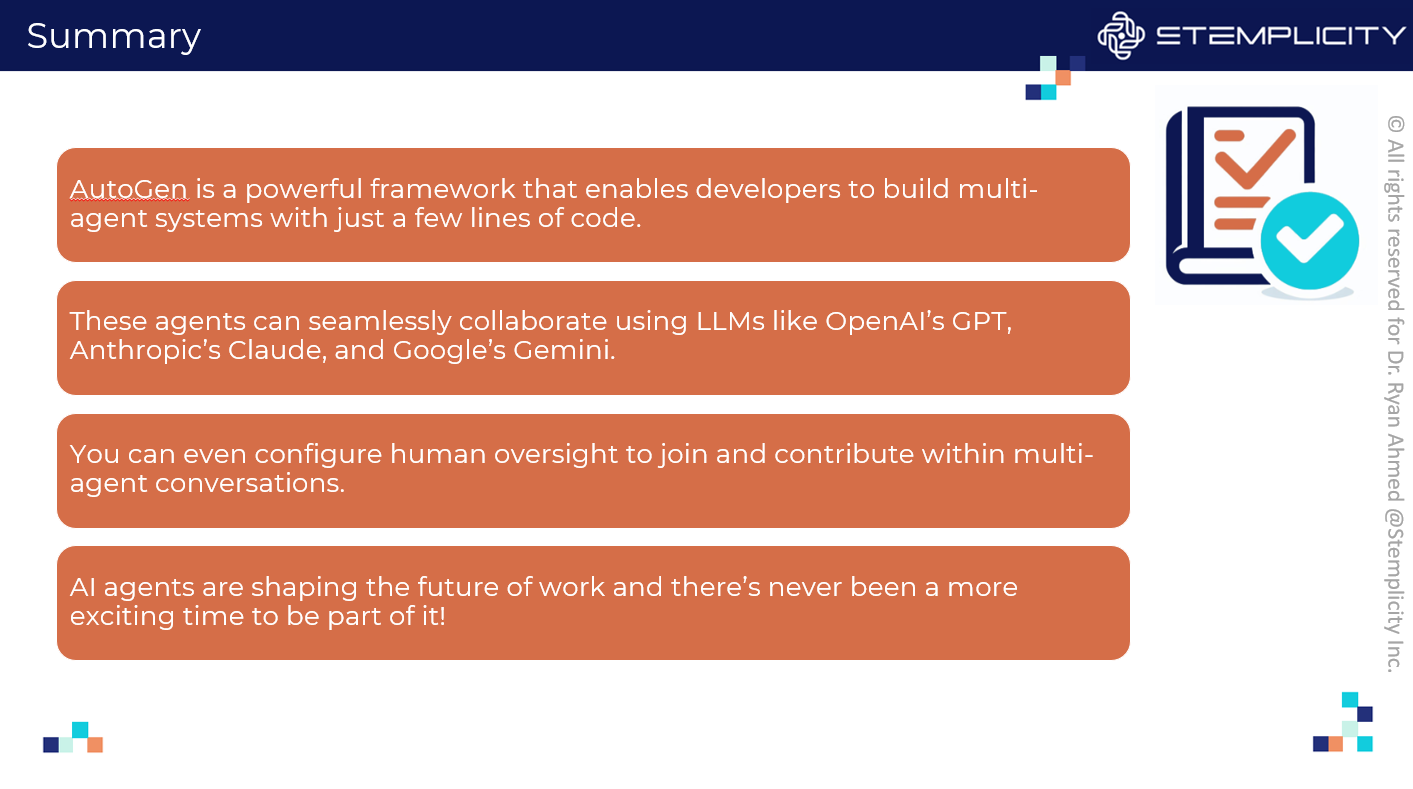

- **Would love to connect with everyone on LinkedIn: www.linkedin.com/in/dr-ryan-ahmed**

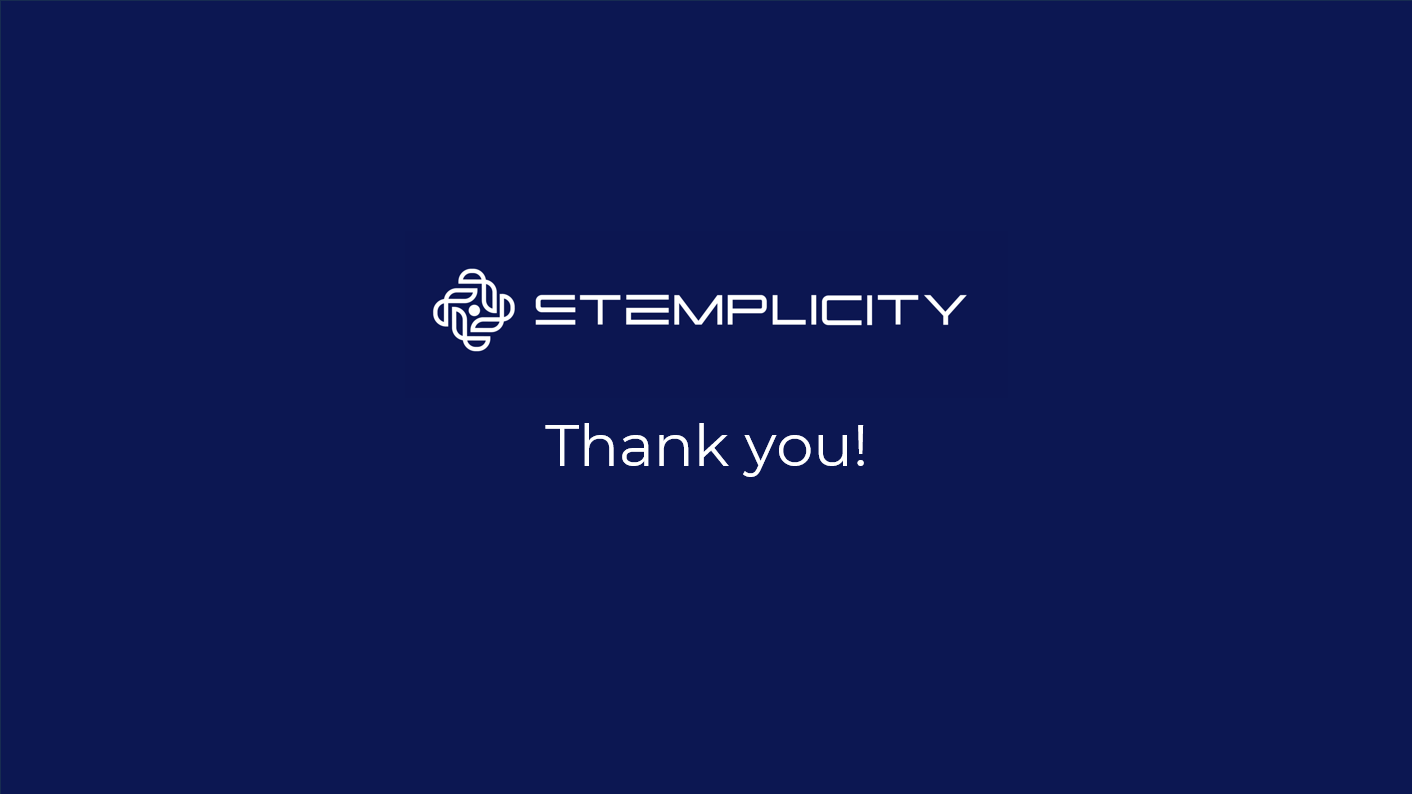